### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
file_path = 'data/coupons.csv'

In [6]:
data = pd.read_csv(file_path)

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

**Missing Values:**
* There are no missing values in the dataset.

**Problematic Data:**
* The column car contains only NaN values, which might be problematic if this column is intended to hold meaningful data.

**Categorical Data:**
* Many columns contain categorical data, which should be handled appropriately during analysis

In [8]:

missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Check for problematic data (e.g., invalid values)
problematic_data = {}
for column in data.columns:
  unique_values = data[column].unique()
  problematic_data[column] = unique_values

print("\nUnique values in each column:")
for column, values in problematic_data.items():
  print(f"{column}: {values}")



Missing values in each column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Unique values in each column:
destination: ['No Urgent Place' 'Home' 'Work']
passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather: ['Sunny' 'Rainy' 'Snowy']
temperatur

3. Decide what to do about your missing data -- drop, replace, other...

**Actions Taken:**

**Dropped Columns with All NaN Values:**
* The column car contained only NaN values, so it was dropped from the dataset.

**Replaced Remaining NaN Values:**
* The remaining NaN values were replaced with a placeholder value 'Unknown'.

In [9]:

# Drop columns with all NaN values
data_cleaned = data.dropna()

# Replace remaining NaN values with a placeholder (e.g., 'Unknown')
data_cleaned = data_cleaned.fillna('Unknown')


4. What proportion of the total observations chose to accept the coupon?



In [10]:
total_observations = len(data_cleaned)
accepted_coupons = data_cleaned['Y'].sum()
proportion_accepted = (accepted_coupons / total_observations)*100
print(proportion_accepted)

57.407407407407405


5. Use a bar plot to visualize the `coupon` column.

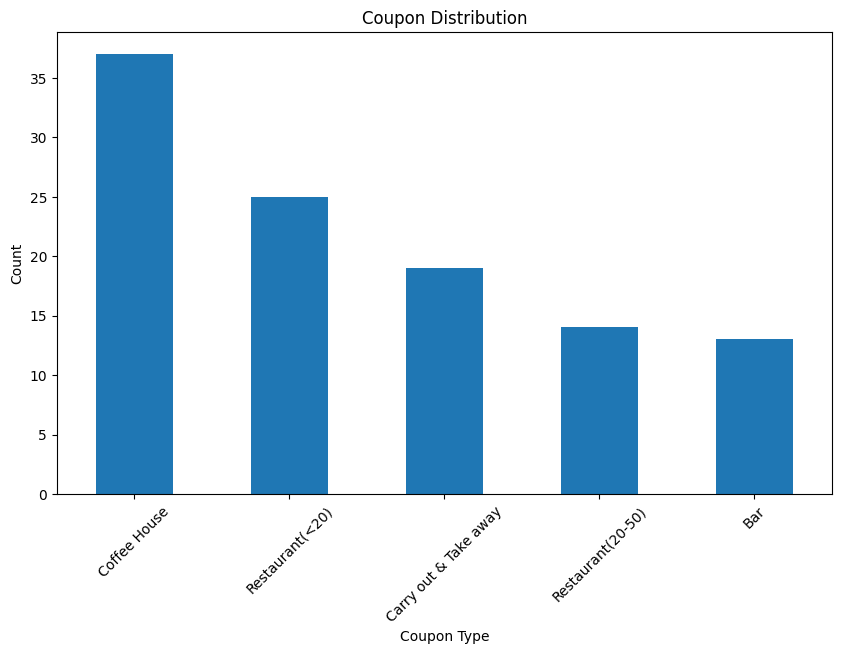

In [11]:

plt.figure(figsize=(10, 6))
data_cleaned['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


6. Use a histogram to visualize the temperature column.

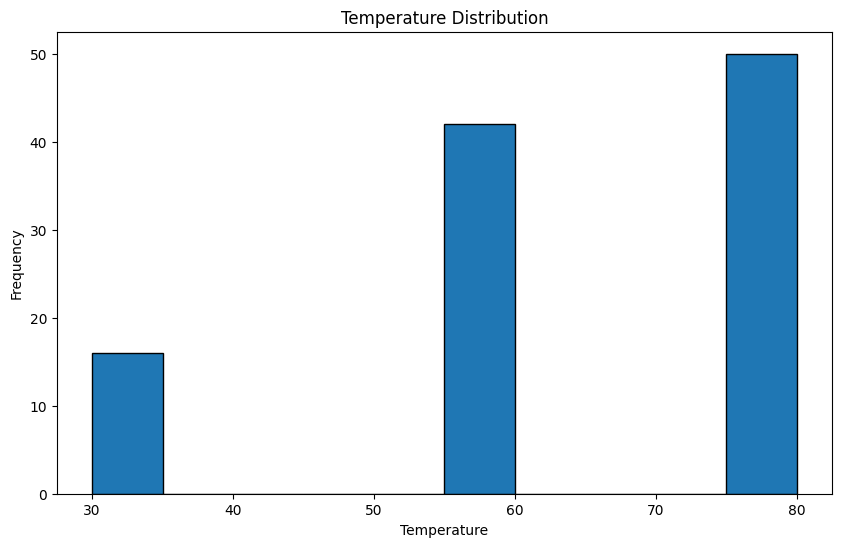

In [12]:
plt.figure(figsize=(10, 6))
data_cleaned['temperature'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:

bar_coupons = data_cleaned[data_cleaned['coupon'] == 'Bar']
bar_coupons.head()
bar_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1239 to 8292
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           13 non-null     object
 1   passanger             13 non-null     object
 2   weather               13 non-null     object
 3   temperature           13 non-null     int64 
 4   time                  13 non-null     object
 5   coupon                13 non-null     object
 6   expiration            13 non-null     object
 7   gender                13 non-null     object
 8   age                   13 non-null     object
 9   maritalStatus         13 non-null     object
 10  has_children          13 non-null     int64 
 11  education             13 non-null     object
 12  occupation            13 non-null     object
 13  income                13 non-null     object
 14  car                   13 non-null     object
 15  Bar                   13 non-null     obje

2. What proportion of bar coupons were accepted?


In [14]:
proportion_accepted = bar_coupons['Y'].mean()

print(f"\nProportion of bar coupons that were accepted: {proportion_accepted:.2f}")


Proportion of bar coupons that were accepted: 0.23


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for those who went to a bar 3 or fewer times a month: 0.37
Acceptance rate for those who went to a bar more than 3 times a month: 0.77


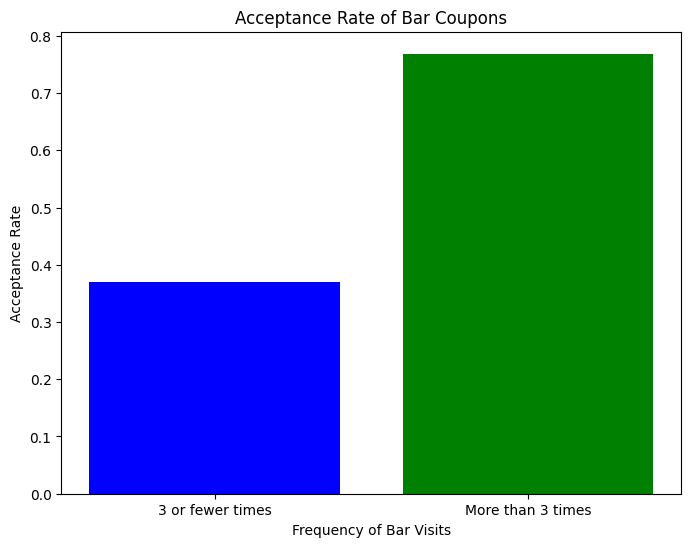

In [15]:

pd.set_option('future.no_silent_downcasting', True)

bar_coupons = data[data['coupon'] == 'Bar'].copy()

bar_coupons = bar_coupons.infer_objects(copy=False)
# Compare the acceptance rate between those who went to a bar 3 or fewer times a month and those who went more
bar_coupons['Bar'] = bar_coupons['Bar'].replace({'never': 0, 'less1': 1, '1~3': 2, '4~8': 4, 'gt8': 8})




# Group by bar visits and calculate acceptance rates
acceptance_rate_fewer = bar_coupons[bar_coupons['Bar'] <= 3]['Y'].mean()
acceptance_rate_more = bar_coupons[bar_coupons['Bar'] > 3]['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_fewer:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more:.2f}")


# Create a bar chart to visualize the acceptance rates
labels = ['3 or fewer times', 'More than 3 times']
rates = [acceptance_rate_fewer, acceptance_rate_more]

plt.figure(figsize=(8, 6))
plt.bar(labels, rates, color=['blue', 'green'])
plt.title('Acceptance Rate of Bar Coupons')
plt.xlabel('Frequency of Bar Visits')
plt.ylabel('Acceptance Rate')
plt.show()



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [16]:
bar_coupons.loc[:, 'Bar'] = bar_coupons['Bar'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})
bar_coupons.loc[:, 'age'] = bar_coupons['age'].replace({
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 55
})

bar_coupons.loc[:,'Bar'] = pd.to_numeric(bar_coupons['Bar'], errors='coerce')
bar_coupons.loc[:,'age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')

# Aceptance rate for drivers who go to a bar more than once a month and are over the age of 25
acceptance_rate_over_25_more_than_once = bar_coupons[
    (bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)
]['Y'].mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_others = bar_coupons[
    ~((bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25))
]['Y'].mean()


print(f"The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is {acceptance_rate_over_25_more_than_once:.2f}")
print(f"The acceptance rate for all other drivers is {acceptance_rate_others:.2f}")


The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 0.70
The acceptance rate for all other drivers is 0.34


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [17]:
# Drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry
filtered_drivers = bar_coupons[(bar_coupons['Bar'] > 1) &
                               (bar_coupons['passanger'] != 'Kid(s)') &
                               (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))]

# Acceptance rate for the filtered drivers
acceptance_rate_filtered = filtered_drivers['Y'].mean()

# Acceptance rate for all other drivers
acceptance_rate_others = bar_coupons[~((bar_coupons['Bar'] > 1) &
                                       (bar_coupons['passanger'] != 'Kid(s)') &
                                       (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])))]['Y'].mean()

print(f"The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is {acceptance_rate_filtered:.2f}")
print(f"The acceptance rate for all other drivers is {acceptance_rate_others:.2f}")

The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is 0.71
The acceptance rate for all other drivers is 0.30


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [18]:
# Condition 1:Drivers who go to bars more than once a month, not with kids, and not widowed
condition_1 = (bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'Kid(s)') & (bar_coupons['maritalStatus'] != 'Widowed')

# Condition 2: Drivers who go to bars more than once a month and are under 30
condition_2 = (bar_coupons['Bar'] > 1) & (bar_coupons['age'] < 30)

# cheap restaurants
cheap_restaurants = data[data['coupon'] == 'Restaurant(<20)'].copy()  # Make a copy to avoid SettingWithCopyWarning
cheap_restaurants.loc[:, 'RestaurantLessThan20'] = cheap_restaurants['RestaurantLessThan20'].replace({
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
})


cheap_restaurants['RestaurantLessThan20'] = pd.to_numeric(cheap_restaurants['RestaurantLessThan20'], errors='coerce')


condition_3 = (cheap_restaurants['RestaurantLessThan20'] > 4) & (cheap_restaurants['income'].isin([
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]))


combined_conditions = condition_1 | condition_2 | condition_3.reindex(bar_coupons.index, fill_value=False)

# Acceptance rate for drivers meeting any of the conditions
acceptance_rate_combined = bar_coupons[combined_conditions]['Y'].mean()

# Acceptance rate for all other drivers
acceptance_rate_others = bar_coupons[~combined_conditions]['Y'].mean()


print(f"The acceptance rate for drivers meeting any of the conditions is {acceptance_rate_combined:.2f}")
print(f"The acceptance rate for all other drivers is {acceptance_rate_others:.2f}")

The acceptance rate for drivers meeting any of the conditions is 0.71
The acceptance rate for all other drivers is 0.29


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations from the data analysis, here are some hypotheses about drivers who accepted the bar coupons:

**Hypotheses:**

**Frequency of Bar Visits:**
* Drivers who visit bars more frequently (more than once a month) are more likely to accept bar coupons. This suggests that these drivers have a higher interest in bar-related activities and are more receptive to incentives related to bars.

**Age Factor:**
* Drivers over the age of 25 who visit bars more than once a month have a higher acceptance rate for bar coupons. This indicates that older drivers who frequent bars may have more disposable income or a greater inclination towards socializing at bars.

**Passenger Influence:**
* Drivers with passengers other than kids are more likely to accept bar coupons. This could be because drivers with adult passengers might be more inclined to stop at a bar for socializing, whereas drivers with kids might avoid bars due to family considerations.

**Occupation:**
* Drivers with occupations other than farming, fishing, or forestry are more likely to accept bar coupons. This might be due to differences in lifestyle and social habits associated with various occupations.

**Summary:**

* Drivers who are more socially active, particularly those who visit bars frequently, are older, have adult passengers, and work in occupations that are not related to farming, fishing, or forestry, tend to have a higher acceptance rate for bar coupons. These factors suggest that lifestyle, social habits, and demographic characteristics play a significant role in the likelihood of accepting bar-related incentives.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [19]:

# Choose a coupon group to explore (e.g., Coffee House)
coupon_group = 'Coffee House'

# Create a new DataFrame that contains just the chosen coupon group
coupon_group_df = data[data['coupon'] == coupon_group].copy()

# Calculate the proportion of accepted coupons in the chosen group
total_coupons = len(coupon_group_df)
accepted_coupons = coupon_group_df['Y'].mean()


# Print the proportion of accepted coupons
print(f"The proportion of accepted {coupon_group} coupons is {accepted_coupons:.2f}")

# Determine the characteristics of passengers who accept the coupons
accepted_coupon_group_df = coupon_group_df[coupon_group_df['Y'] == 1]

###################################################################
#Acceptance rate by age group
###################################################################
acceptance_rate_by_age = accepted_coupon_group_df['age'].value_counts(normalize=True)
print("\nAcceptance rate by age group:")
print(acceptance_rate_by_age)


# Calculate the distribution of passengers who accepted the coupons
passenger_distribution = accepted_coupon_group_df['passanger'].value_counts(normalize=True)

# Calculate the distribution of occupations of passengers who accepted the coupons
occupation_distribution = accepted_coupon_group_df['occupation'].value_counts(normalize=True)

# Print the distributions
print(f"\nDistribution of passengers who accepted {coupon_group} coupons:")
print(passenger_distribution)

print(f"\nDistribution of occupations of passengers who accepted {coupon_group} coupons:")
print(occupation_distribution)



The proportion of accepted Coffee House coupons is 0.50

Acceptance rate by age group:
age
21         0.232080
26         0.217544
31         0.148872
50plus     0.114787
36         0.094236
41         0.081704
46         0.056642
below21    0.054135
Name: proportion, dtype: float64

Distribution of passengers who accepted Coffee House coupons:
passanger
Alone        0.495238
Friend(s)    0.367419
Partner      0.087218
Kid(s)       0.050125
Name: proportion, dtype: float64

Distribution of occupations of passengers who accepted Coffee House coupons:
occupation
Student                                      0.156391
Unemployed                                   0.154887
Computer & Mathematical                      0.113283
Sales & Related                              0.069674
Management                                   0.068170
Education&Training&Library                   0.064662
Arts Design Entertainment Sports & Media     0.053133
Office & Administrative Support              0.042607
B

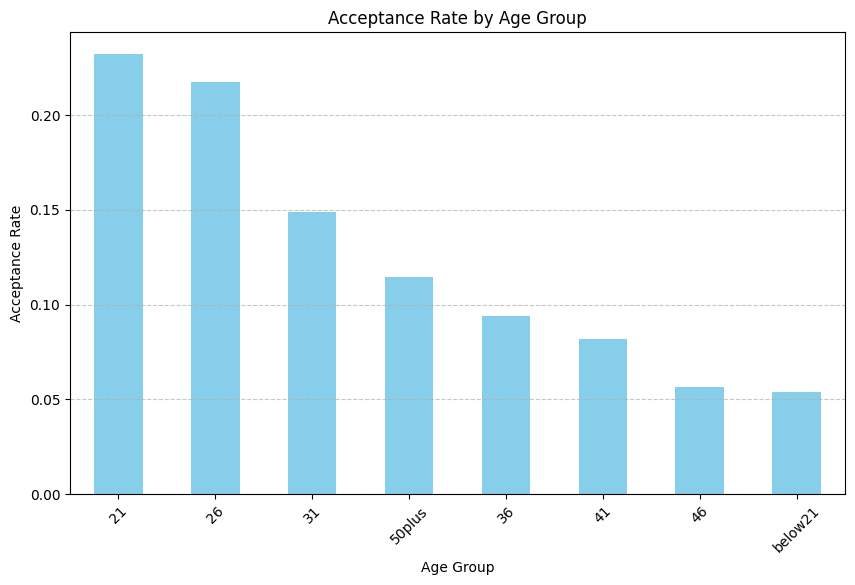

In [20]:

# Create a bar chart
plt.figure(figsize=(10, 6))
acceptance_rate_by_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


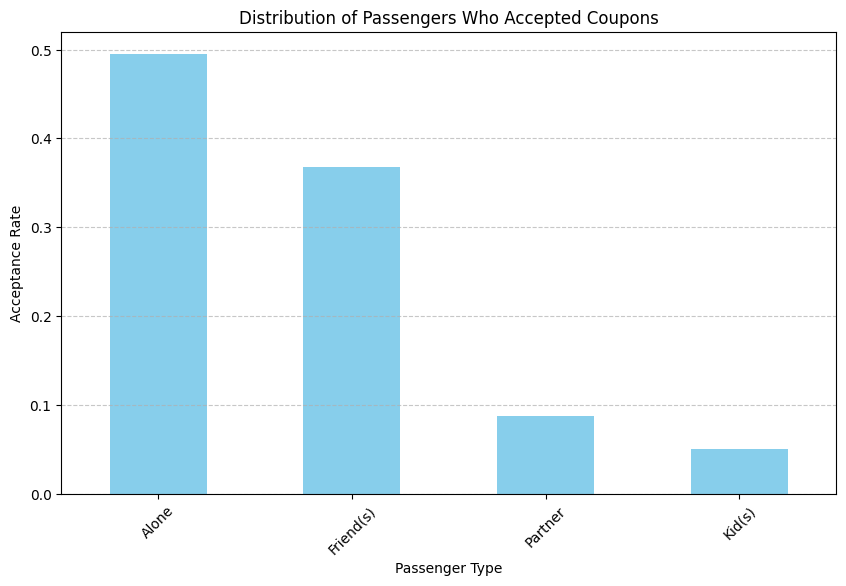

In [21]:

plt.figure(figsize=(10, 6))
passenger_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.title('Distribution of Passengers Who Accepted Coupons')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


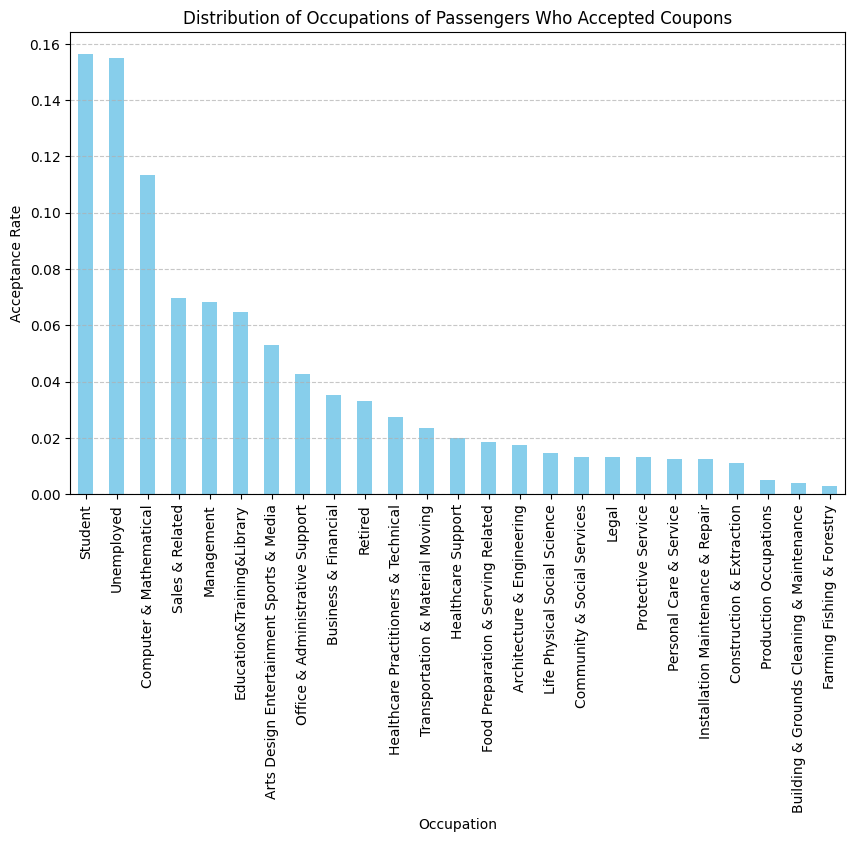

In [22]:

# Create a bar chart
plt.figure(figsize=(10, 6))
occupation_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Acceptance Rate')
plt.title('Distribution of Occupations of Passengers Who Accepted Coupons')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Example data was explored for the Coffee House coupon group to determine the characteristics of passengers who accept these coupons.

**Proportion of Accepted Coffee House Coupons:**

**Acceptance rate:** 0.50 (50% of Coffee House coupons were accepted)

**Characteristics of Passengers Who Accepted Coffee House Coupons**:

**Pessanger Age Distribution:**

| Age     | Percentage(%)   |
| --------| ----------------|
| **21**      | 23.21           |
| **26**      | 21.75           |
| **31**      | 14.90           |
| **50 Plus** | 11.50           |
| **36**      | 9.42            |
| **41**      | 8.17            |
| **46**      | 5.66            |
| **Below21** | 5.41            |



**Passenger Distribution:**

| Passanger         | Percentage(%)     |
| -----------       | -----------       |
| **Alone**         | 49.52             |
| **Friend(s)**     | 36.74             |
| **Partner**       | 8.72              |
| **Kid(s)**        | 5.01              |


**Occupation Distribution:**

| Occupation                                      | Percentage(%) |
|-------------------------------------------------|------------|
| **Student**                                     | 15.64      |
| **Unemployed**                                  | 15.49      |
| **Computer & Mathematical**                     | 11.33      |
| **Sales & Related**                             | 6.97       |
| **Management**                                  | 6.82       |
| **Education & Training & Library**              | 6.47       |
| **Arts Design Entertainment Sports & Media**    | 5.31       |
| **Office & Administrative Support**             | 2.36       |
| **Healthcare Support**                          | 2.01       |
| **Food Preparation & Serving Related**          | 1.85       |
| **Architecture & Engineering**                  | 1.75       |
| **Life Physical Social Science**                | 1.45       |
| **Community & Social Services**                 | 1.30       |
| **Legal**                                       | 1.30       |
| **Protective Service**                          | 1.30       |
| **Personal Care & Service**                     | 1.25       |
| **Installation Maintenance & Repair**           | 1.25       |
| **Construction & Extraction**                   | 1.10       |
| **Production Occupations**                      | 0.50       |
| **Building & Grounds Cleaning & Maintenance**   | 0.40       |
| **Farming Fishing & Forestry**                  | 0.30       |



**Summary and Finding**:
* Passengers who accepted Coffee House coupons were most likely to be traveling alone or with friends. The majority of these passengers were students or unemployed, followed by those in computer & mathematical, sales, and management occupations. This suggests that Coffee House coupons are more appealing to individuals who are either studying, unemployed, or working in tech, sales, or management roles.

**Next Steps and Recommendations:**

**Target Marketing:**
* Focus marketing efforts on individuals who are students, unemployed, or working in tech, sales, or management roles.

**Promotional Strategies:**
* Develop promotional strategies that appeal to individuals traveling alone or with friends.

**Age-Specific Campaigns:**
* Create age-specific campaigns targeting individuals aged 21 to 31, as they have the highest acceptance rates.